# DATA 620 Week 6 Assignment - Two mode networks
### CLAUDIO, Mauricio
#### 1 March 2024
___
___

## [Davis Club](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

BACKGROUND These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

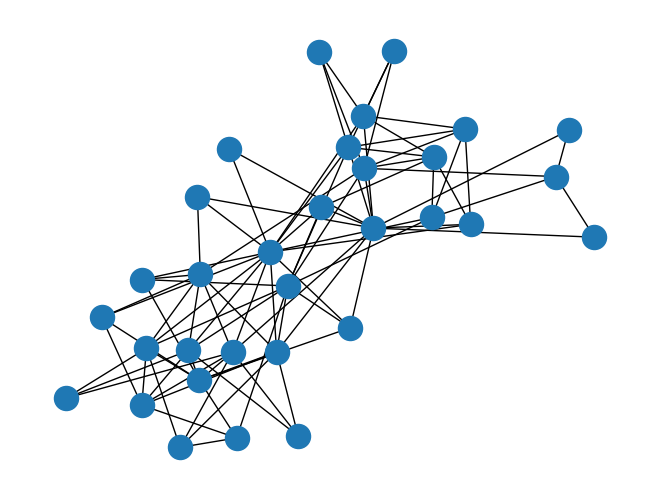

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

___

### Network of Women

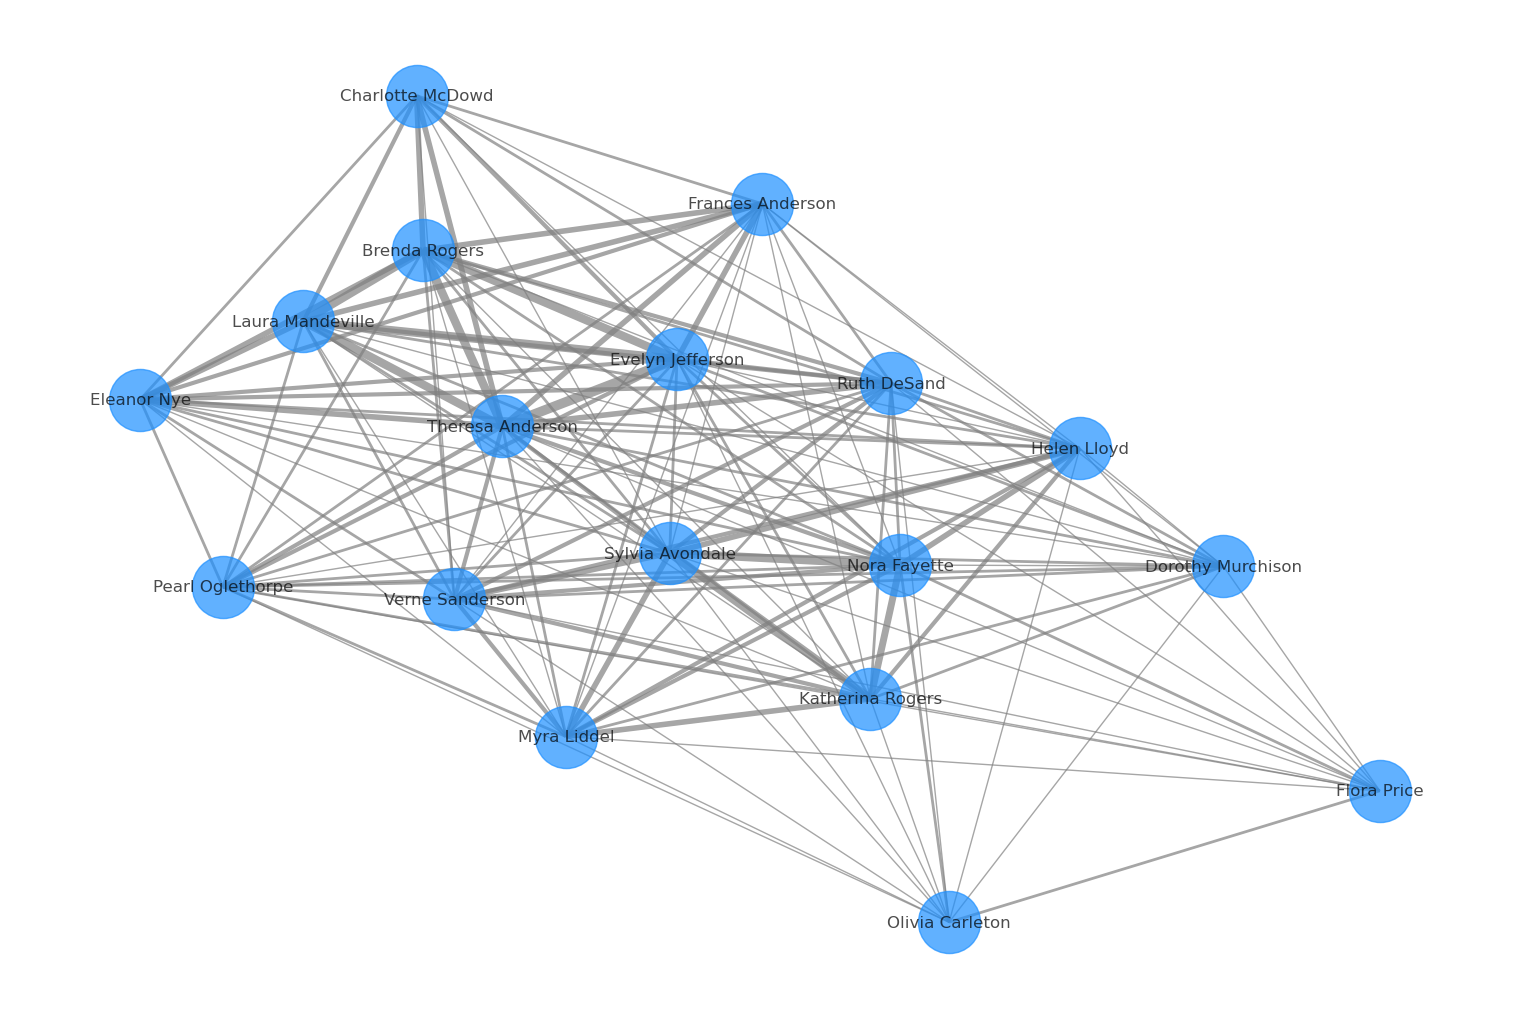

In [106]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

# import math
weights = [(edata['weight']) for f, t, edata in W.edges(data=True)]

nx.draw(W,
        width=weights,
        with_labels=True,
        node_size=2000,
        node_color="dodgerblue",
        font_size=12,
        edge_color="grey",
        alpha=0.7)

___

### Network of Clubs

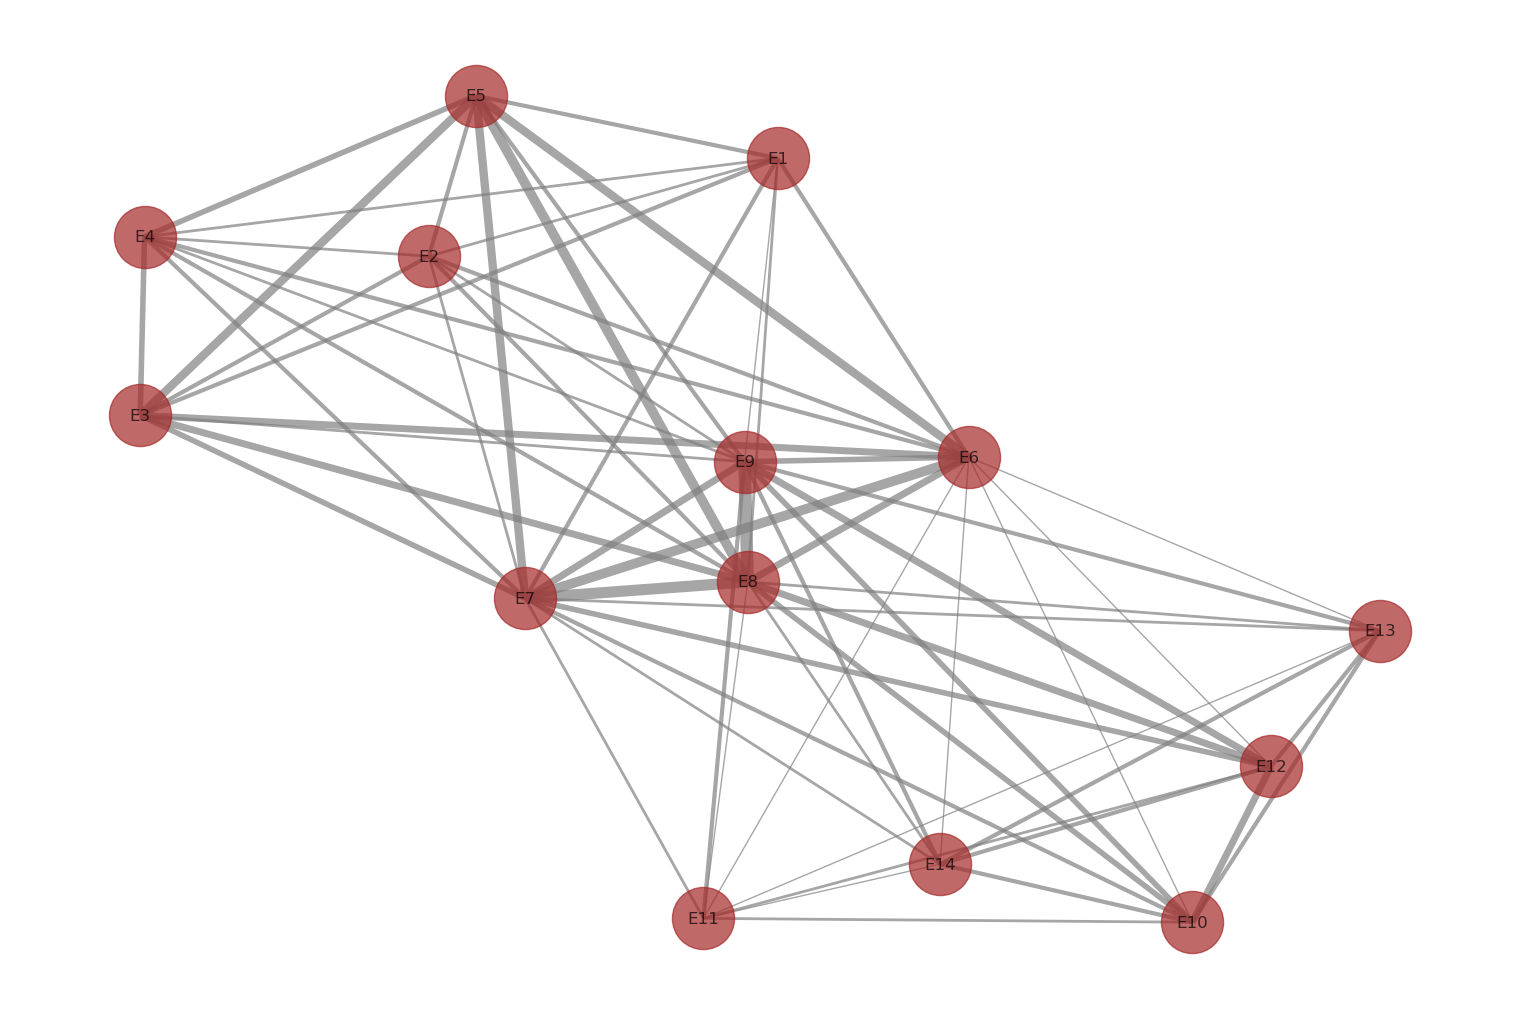

In [109]:
C = bipartite.projected_graph(G, clubs)
C1 = bipartite.weighted_projected_graph(G, clubs)

weights=[(edata['weight']) for f,t,edata in C1.edges(data=True)]

nx.draw(C,
        width=weights,
        with_labels=True,
        node_size=2000,
        node_color="brown",
        font_size=12,
        edge_color="grey",
        alpha=0.7)

___

### Network of Women and Clubs

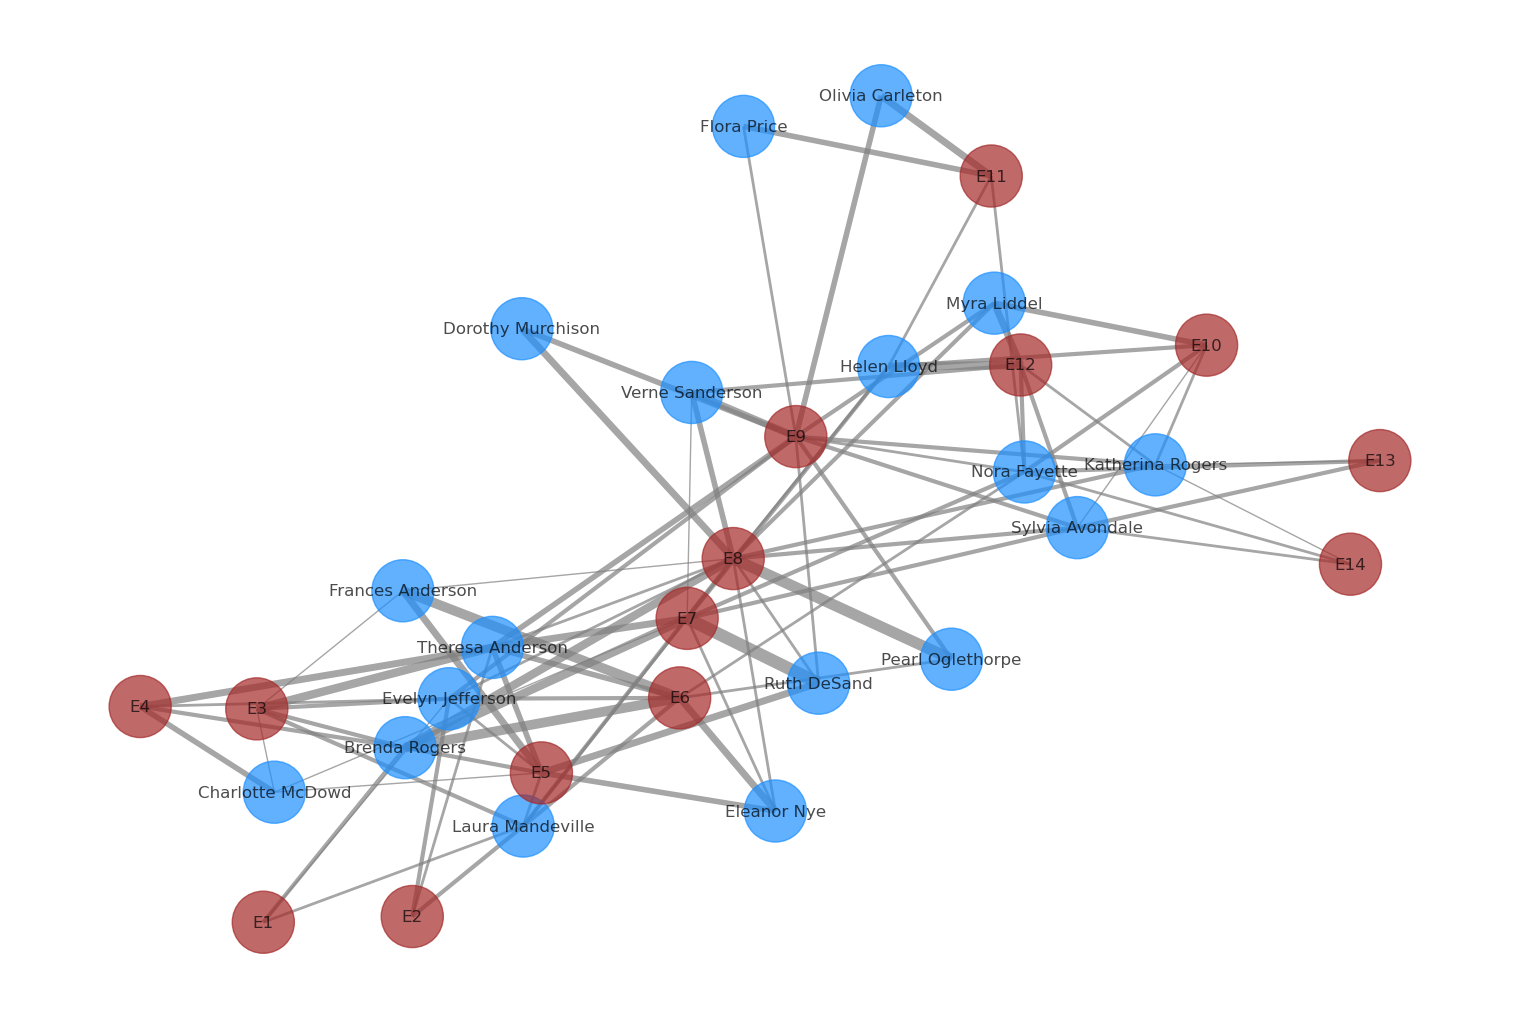

In [111]:
colors = []
for node, data in G.nodes(data=True):
    if data['bipartite']==1:
        colors.append('brown')         
    else:
        colors.append('dodgerblue')

nx.draw(G,
        with_labels=True,
        width=weights,
        node_size=2000,
        node_color=colors,
        font_size=12,
        edge_color="gray",
        alpha=0.7)

___

### What can be inferred about relationships from the graphs?

A handful of women seem to dominate social life as they have significantly more connections than other women. These women include T. Anderson, B. Rogers, L. Mandeville and E. Jefferson just to name a few. Conversely, a few other women like E. Nye, O. Carleton and F. Price are on the fringe of the women network.

Among clubs, the most popular are E6 throug E9 while the least popular clubs are E13 and E14.

Finally looking at the Women/Club network, we see the likes of T. Anderson, the most popular woman, involved in the four most popular clubs. A similar phenomonon of popular women in popular clubs is apparent for the most popular group of women.



___
___